# Librerias

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import radon, iradon
from scipy.ndimage import zoom
from matplotlib.patches import Ellipse
import numpy as np
import cv2 as cv

##Phantom

Un phantom es la representación en dos dimensiones de un corte del interior de un volumen. 

In [3]:
#Intensidad: Varía entre -1 y 1, ya que es aditiva. (I)
#Inclinación: Ángulo en grados de rotación respecto al eje x. (A)
#Semi-eje X: Valor del semi-eje X de la elipse, entre (0 ; 1]. (X)
#Semi-eje Y: Valor del semi-eje Y de la elipse, entre (0 ; 1]. (Y)
#Centro X: Coordenada X del centro de la elipse, entre [-1 ; 1]. (CX)
#Centro Y: Coordenada Y del centro de la elipse, entre [-1 ; 1]. (CY)
#ellipse = [Intensidad, Inclinación, x, y, centro x, centro y]

def Phantom(ellipses, fig):
  ax = fig.add_subplot(111, aspect='equal')
  for e in ellipses:
    el = Ellipse(xy=(e[4], e[5]), width=e[2], height=e[3], angle=e[1])
    el.set_alpha(e[0])
    ax.add_artist(el)
    el.set_clip_box(ax.bbox)

  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)

  fig.canvas.draw()
  plt.axis('off')
  img = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8, sep='')
  plt.savefig("phantom.png", bbox_inches='tight', transparent=True)

  return img

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


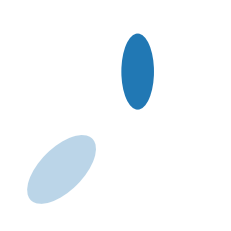

In [4]:
fig = plt.figure(1)
ellipses = []
ellipses.append([0.99, 0.0, 0.3, 0.7, 0.2, 0.4])
ellipses.append([0.3, 45.0, .8, -0.4, -0.5, -0.5])
phantom = Phantom(ellipses, fig)

## Transformada de Radon

In [5]:
def GetRadonTransforms(img,start_phi, stop_phi, step):
  angle_arr = np.arange(start=start_phi,stop=stop_phi+0.1,step=step)
  print(angle_arr)
  projections = radon(img, theta=angle_arr)
  return projections

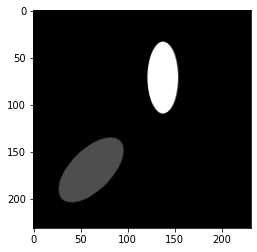

(231, 231)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


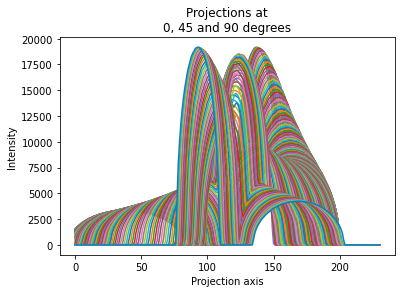

In [6]:
img = cv.imread("phantom.png", cv.IMREAD_UNCHANGED)
img = 255 - img[:, :, 3]
img = cv.bitwise_not(img)

plt.imshow(img,cmap="gray")
plt.show()
print(img.shape)
start_phi = 0
stop_phi = 180
step=1
projections = GetRadonTransforms(img,start_phi, stop_phi, step)
plt.plot(projections)
plt.title("Projections at\n0, 45 and 90 degrees")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
plt.show()

# Reoonstruccion a partir de proyecciones

In [7]:
def Reconstruction(projections,angles,size=None,filter_="ramp", interpolation_="linear"):
  return iradon(projections, theta=angles, output_size=size, filter=filter_, interpolation=interpolation_)

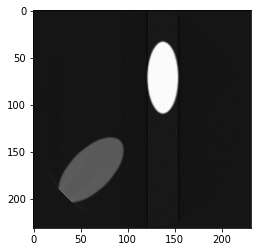

In [8]:
plt.imshow( Reconstruction(projections,np.arange(start=start_phi,stop=stop_phi+0.1,step=step) ),cmap="gray" )